In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## CO<sub>2</sub> Production Data

In [5]:
carbon = pd.read_csv('data/carbon_monitor.csv')
carbon

,country,date,sector,MtCO2 per day
0,Brazil,01/01/2022,Power,0.173988
1,China,01/01/2022,Power,17.564600
2,EU27 & UK,01/01/2022,Power,1.413870
3,France,01/01/2022,Power,0.049170
4,Germany,01/01/2022,Power,0.305948
...,...,...,...,...
1652,NaN,NaN,NaN,NaN
1653,carbonmonitor.org,NaN,NaN,NaN
1654,"April 14th, 2023",NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN


This is data for daily CO<sub>2</sub> production by date, country, and sector.

### Visualize and Summarize

#### Missing data

There are a few missing entries in each column.

In [6]:
carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1654 non-null   object 
 1   date           1652 non-null   object 
 2   sector         1652 non-null   object 
 3   MtCO2 per day  1652 non-null   float64
dtypes: float64(1), object(3)
memory usage: 51.9+ KB


#### Countries

In [7]:
carbon['country'].value_counts()

Brazil               118
China                118
EU27 & UK            118
France               118
Germany              118
India                118
Italy                118
Japan                118
ROW                  118
Russia               118
Spain                118
UK                   118
US                   118
WORLD                118
carbonmonitor.org      1
April 14th, 2023       1
Name: country, dtype: int64

The entries which are clearly not locations at all contain no data, and can be eliminated. They are at the end of the file and there are three other blank rows at the end of the file. Eliminating the last five rows also eliminates all of the missing values.

In [8]:
print(carbon[carbon.country == 'carbonmonitor.org'])
print(carbon[carbon.country == 'April 14th, 2023'])

                country date sector  MtCO2 per day
1653  carbonmonitor.org  NaN    NaN            NaN
               country date sector  MtCO2 per day
1654  April 14th, 2023  NaN    NaN            NaN


In [9]:
carbon.iloc[-5:]

,country,date,sector,MtCO2 per day
1652,NaN,NaN,NaN,NaN
1653,carbonmonitor.org,NaN,NaN,NaN
1654,"April 14th, 2023",NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN
1656,NaN,NaN,NaN,NaN


In [10]:
carbon = carbon.iloc[:-5]

In [11]:
carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1652 non-null   object 
 1   date           1652 non-null   object 
 2   sector         1652 non-null   object 
 3   MtCO2 per day  1652 non-null   float64
dtypes: float64(1), object(3)
memory usage: 51.8+ KB


There are some locations that appear to be sums of multiple countries ("EU27 & UK", "WORLD", and "ROW"). These should probably be eliminated or put into separate data frames if they are of interest.

In [12]:
# Data on first date
carbon_first_day = carbon[carbon.date == "01/01/2022"]

# Sum of European countries
carbon_first_day_Eur =\
    float(carbon_first_day[carbon_first_day.country == 'France']['MtCO2 per day']) + \
    float(carbon_first_day[carbon_first_day.country == 'Germany']['MtCO2 per day']) + \
    float(carbon_first_day[carbon_first_day.country == 'Italy']['MtCO2 per day']) + \
    float(carbon_first_day[carbon_first_day.country == 'Spain']['MtCO2 per day']) + \
    float(carbon_first_day[carbon_first_day.country == 'UK']['MtCO2 per day'])

# Check if EU27 & UK is greater than the sum of European countries
chk1 = float(carbon_first_day[carbon_first_day.country == 'EU27 & UK']['MtCO2 per day']) \
        > carbon_first_day_Eur

# Check if the sum of all countries + ROW (rest of world) is approximately equal to WORLD
# Note that European countries are double counted and their sum needs to be subtracted
world_sum1 = \
    carbon_first_day[carbon_first_day.country != 'WORLD']['MtCO2 per day'].sum() - carbon_first_day_Eur
world_sum2 = carbon_first_day[carbon_first_day.country == 'WORLD']['MtCO2 per day']
chk2 = np.allclose(world_sum1, world_sum2)

print(chk1, chk2)

# Eliminate "WORLD", "EU27 & UK", and "ROW" from the data
# carbon[]
carbon = carbon[~carbon.country.isin(["WORLD", "EU27 & UK", "ROW"])]

carbon['country'] = carbon['country'].astype('category')

True True


#### Sectors

The only sector is "Power".

In [13]:
carbon['sector'].value_counts()

Power    1298
Name: sector, dtype: int64

#### Dates

The data are only from the months of January and February only with 649 rows (one per day for each country) from each of the years 2022 and 2023.

In [14]:
# Convert date to datetime
carbon['date'] = pd.to_datetime(carbon.date, format='%d/%m/%Y')

In [15]:
# Month counts
month_counts = pd.DataFrame(carbon.date.dt.month.value_counts()).reset_index().rename(
    columns={'index': 'month', 'date': 'count'})
month_counts['month'] = month_counts['month'].astype('str')
month_counts['month'] = ['January', 'February']
print(month_counts)

      month  count
0   January    682
1  February    616


In [16]:
# Year counts
year_counts = pd.DataFrame(carbon.date.dt.year.value_counts()).reset_index().rename(
    columns={'index': 'year', 'date': 'count'})
print(year_counts)

   year  count
0  2022    649
1  2023    649


In [17]:
# Look at the dates for one country in one year
carbon[(carbon.country == 'France')*(carbon.date.dt.year == 2022)].date

3     2022-01-01
17    2022-01-02
31    2022-01-03
45    2022-01-04
59    2022-01-05
73    2022-01-06
87    2022-01-07
101   2022-01-08
115   2022-01-09
129   2022-01-10
143   2022-01-11
157   2022-01-12
171   2022-01-13
185   2022-01-14
199   2022-01-15
213   2022-01-16
227   2022-01-17
241   2022-01-18
255   2022-01-19
269   2022-01-20
283   2022-01-21
297   2022-01-22
311   2022-01-23
325   2022-01-24
339   2022-01-25
353   2022-01-26
367   2022-01-27
381   2022-01-28
395   2022-01-29
409   2022-01-30
423   2022-01-31
437   2022-02-01
451   2022-02-02
465   2022-02-03
479   2022-02-04
493   2022-02-05
507   2022-02-06
521   2022-02-07
535   2022-02-08
549   2022-02-09
563   2022-02-10
577   2022-02-11
591   2022-02-12
605   2022-02-13
619   2022-02-14
633   2022-02-15
647   2022-02-16
661   2022-02-17
675   2022-02-18
689   2022-02-19
703   2022-02-20
717   2022-02-21
731   2022-02-22
745   2022-02-23
759   2022-02-24
773   2022-02-25
787   2022-02-26
801   2022-02-27
815   2022-02-

#### CO2 produced

Looking at a KDE distribution or a box plot shows that the China Power sector produces more than twice the CO<sub>2</sub> than the Power sector of any other country in the data set. 

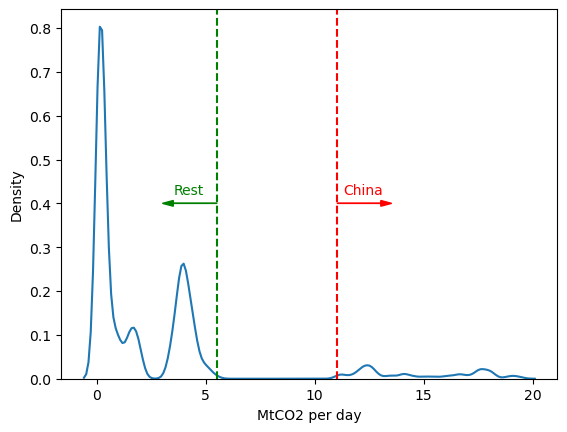

In [18]:
sns.kdeplot(carbon['MtCO2 per day'], bw_method=0.05);

ylims = plt.ylim()

plt.plot([11.0292, 11.0292], plt.ylim(ylims), 'r--')
plt.arrow(11.0292, 0.4, 2, 0, width=0.0001, head_width=0.013, head_length=0.5, color='r')
plt.text(11.3, 0.42, 'China', color='r');

plt.plot([5.50708, 5.50708], plt.ylim(ylims), 'g--')
plt.arrow(5.50708, 0.4, -2, 0, width=0.0001, head_width=0.013, head_length=0.5, color='g')
plt.text(3.5, 0.42, 'Rest', color='g');


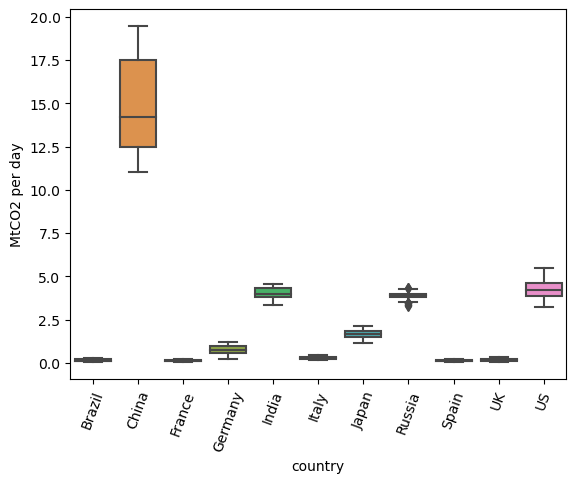

In [19]:
plt.xticks(rotation=70) 
sns.boxplot(x='country', y='MtCO2 per day', data=carbon);

In [ ]:
# Countries with more than 10 MtCO2 per day
carbon[carbon['MtCO2 per day'] > 10].country.value_counts()

China      118
Brazil       0
France       0
Germany      0
India        0
Italy        0
Japan        0
Russia       0
Spain        0
UK           0
US           0
Name: country, dtype: int64

In [ ]:
# Minimum CO2 production per day in China
carbon[carbon.country == 'China']['MtCO2 per day'].min()

11.0292

In [ ]:
# Maximum CO2 production per day in China
carbon[carbon.country != 'China']['MtCO2 per day'].max()

5.50708

Most countries had similar trends in CO<sub>2</sub> production over time in 2022 compared to 2023, but Brazil had a significant decrease in the average production from 2022 to 2023 and India had a significant increase from 2022 to 2023.

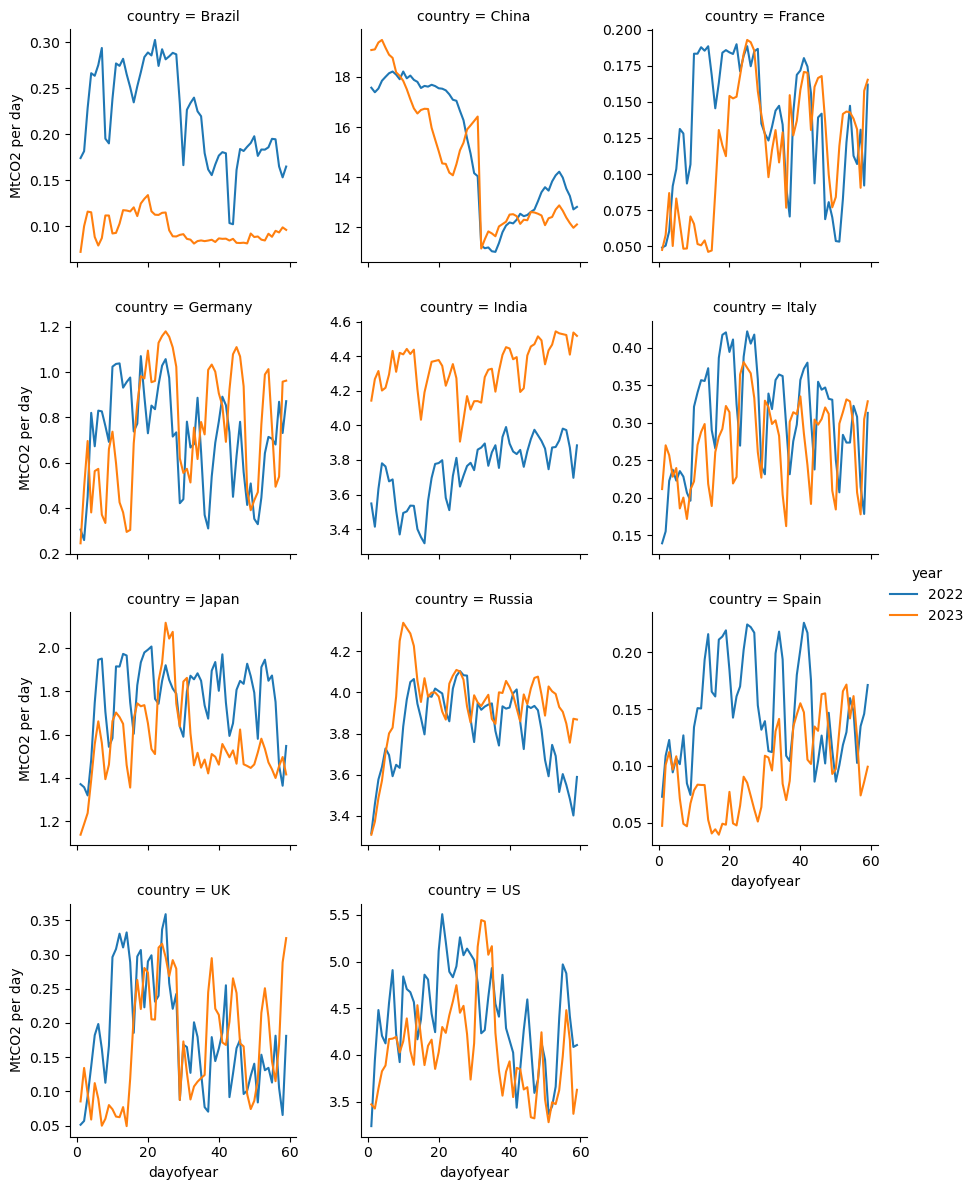

In [20]:
# Day of year, year
carbon['dayofyear'] = carbon.date.dt.dayofyear
carbon['year'] = carbon.date.dt.year

# Facet by country and color by year
grid = sns.FacetGrid(carbon, col='country', col_wrap=3, hue='year', sharey=False)

# Plot a line for each year on each facet
grid.map_dataframe(sns.lineplot, x='dayofyear', y='MtCO2 per day')
grid.add_legend();

### Summary

For a given country, there is only data for two years in January and February and the only variable available to predict CO<sub>2</sub> production is date. Mean CO<sub>2</sub> production taken over 2022 and 2023 and over a given time range within January and February might be used to roughly predict production over the same range in 2024, but not very accurately given the small amount of data. Trends over years are impossible to see with only two years of data. Even if more years of data were available, it would also not be possible to determine whether any trends were actually due to changing methods of power production instead of weather, population change, or other factors without additional types of data.